In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0) # This makes the images larger in the notebook


In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB9.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [4]:
import glob
imageFiles = glob.glob('Photos/boat/*')
imageFiles.sort()

images = []
for imageFile in imageFiles:
    img = cv.imread(imageFile)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
    if img is not None:
        images.append(img) 
num_images = len(images)
print(f"Total images found: {num_images}")

Total images found: 6


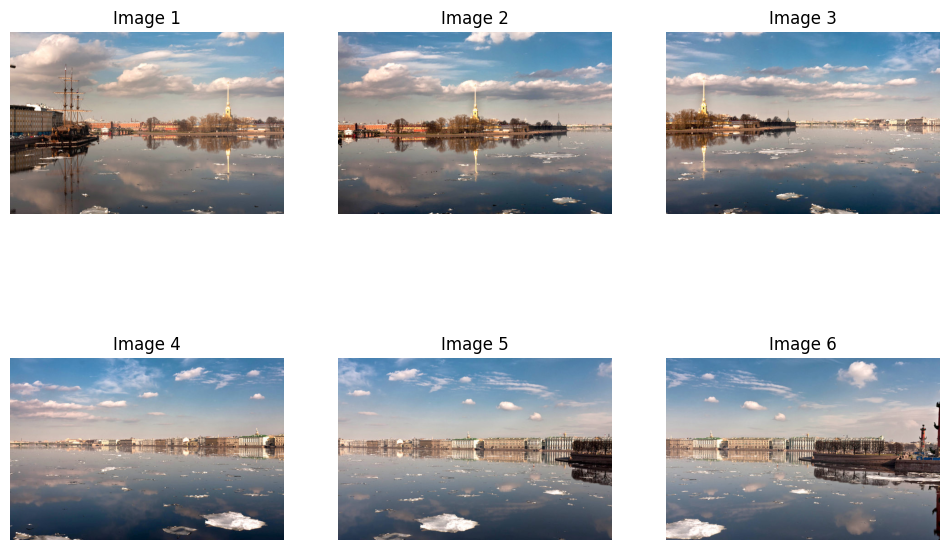

In [5]:
plt.figure(figsize=(12, 12))
for i, img in enumerate(images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i + 1}")

Stitching completed successfully.


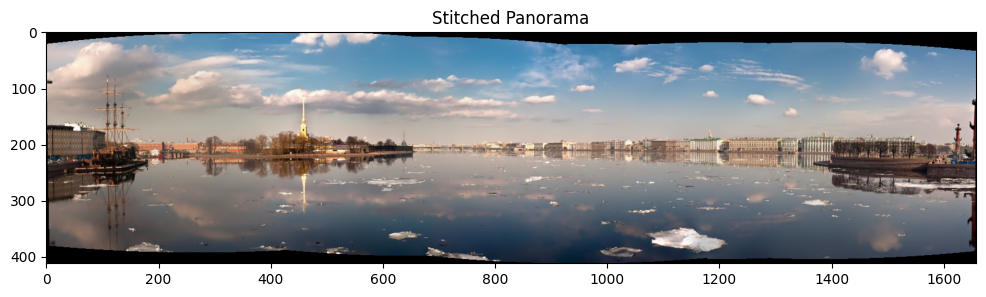

In [7]:
# Stitching images together
# Stitching is a process of combining multiple images to create a panorama or a larger image.

stitcher = cv.Stitcher_create()
status, pano = stitcher.stitch(images)
if status == cv.Stitcher_OK:
    print("Stitching completed successfully.")
    plt.figure(figsize=(12, 12))
    plt.imshow(pano)
    plt.title("Stitched Panorama")